# Lab - Texture Analysis

## Part A

### Objective

The goal of this part is to segment the following photo into 3 segments: 
1. a segment for clothes with a jeans texture
2. a segment for clothes with a cotton texture
3. a segment for the background

<img src='test.jpg' width=100px heigth=300px></img>

In [138]:
# All the imports you will need in the whole lab
from skimage.feature import greycomatrix, greycoprops
from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.util import img_as_ubyte

## Section 1

In this section, you will extract features from image samples of the jeans and cotton texture using GLCM, then we will plot our feature space to see if our features are able to differentiate between the textures of jeans, cotton, and background. 

### TODO Implement get_glcm_features

You will need the following two functions:

greycomatrix, doc link -> https://scikit-image.org/docs/dev/api/skimage.feature.html#greycomatrix <br>
greycoprops, doc link -> https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycoprops

In [139]:
def get_glcm_features(gray_scale_img):
    """
    Given a grayscale image with graylevels from 0 - 255, this function returns the contrast
    and the homogeneity features of the image with the help of GLCM
    """
    # Tip: Make sure you understand the input-output of everything you write, 
    # not doing that results in bugs that makes you take a lot of time solving the lab

    #distances=List of pixel pair distance offsets.
    #angles List of pixel pair angles in radians.  الزاوية بين البيكسل وجارها 
    #A p-by-2 array of integers specifying the distance between the pixel of interest and its neighbor. Each row in the array is a two-element vector, [row_offset, col_offset], that specifies the relationship, or offset, of a pair of pixels. row_offset is the number of rows between the pixel-of-interest and its neighbor. col_offset is the number of columns between the pixel-of-interest and its neighbor. Because the offset is often expressed as an angle, the following table lists the offset values that specify common angles, given the pixel distance D.
    #levels=grey levels
    #A gray level co-occurrence matrix is a histogram of co-occurring grayscale values at a given offset over an image.
                                                             #315
    glcm = greycomatrix(gray_scale_img , distances = [1] , angles = [7*np.pi / 4] , levels=256)
    contrast = greycoprops(glcm, 'contrast')
    homogeneity = greycoprops(glcm, 'homogeneity')
    return contrast, homogeneity

img = io.imread('imgs_patches/jeans1.jpg')
img = rgb2gray(img)
img = (img*255).astype(np.uint8)
get_glcm_features(img)

d:\anaconda\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
d:\anaconda\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
d:\anaconda\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


(array([[919.40416278]]), array([[0.04791453]]))

The following part will extract the contrast and homogeneity of samples of jeans and cotton in the folder "imgs_patches" using your function. So, for each sample image, we will have a point in a 2D feature space. Then, it will plot this feature space.

d:\anaconda\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
d:\anaconda\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
d:\anaconda\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
d:\anaconda\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
d:\anaconda\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: F

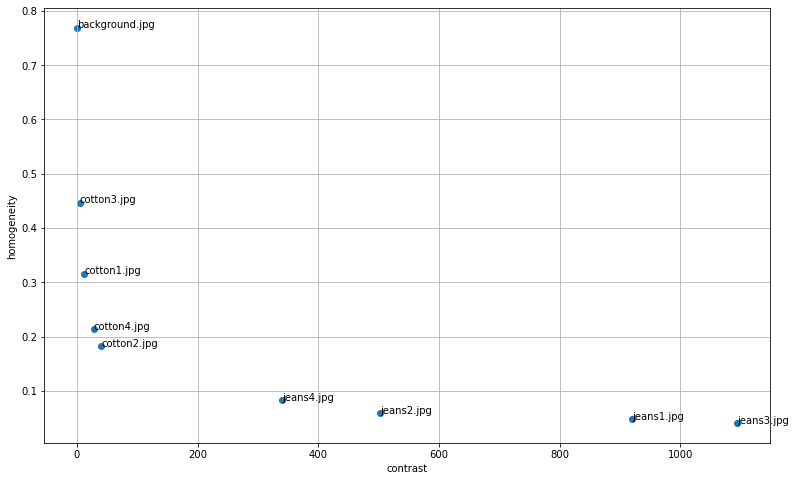

In [140]:
# You don't need to understand how this function works
def get_fname_images_tuple(directory):
    fnames = os.listdir(directory)
    to_return = []
    for fn in fnames:
        if fn[-3:] == 'jpg':
            path = os.path.join(directory, fn)
            gray_scale_image = (rgb2gray(io.imread(path)) * 255).astype(np.uint8)
            to_return.append((fn, gray_scale_image))
        else:
            print('This file has been skipped', fn)
    return to_return

# You don't need to understand how this function works
def plot_2d_features_with_names(names_fts_list, xlabel, ylabel):
    x = [names_fts[1][0] for names_fts in names_fts_list]
    y = [names_fts[1][1] for names_fts in names_fts_list]
    txts = [names_fts[0] for names_fts in names_fts_list]
    
    fig, ax = plt.subplots()
    ax.scatter(x, y)

    for i, txt in enumerate(txts):
        ax.annotate(txt, (x[i], y[i]))
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig = plt.gcf()
    fig.set_size_inches(13, 8)
    
    
fn_img_list = get_fname_images_tuple(r'imgs_patches')

fn_ft_list = []
for fn, img in fn_img_list:
    fn_ft_list.append((fn, get_glcm_features(img)))
    
plot_2d_features_with_names(fn_ft_list, 'contrast', 'homogeneity')

## Section 2

You should have noticed that the previous section showed us that we can differentiate between jeans, cotton, & background patches using contrast and homogeneity. So, in this section, we will classify an unknown patch into one of those categories using a simple rule-based classifier. This will make us able to segment an image.

In [141]:
# TODO implement this function

def classify_patch(contrast, homogeneity):
    """
    Given the contrast and homogeneity values of a certain image patch, this function 
    will return the class of the patch, i.e either 'jeans', 'cotton', or 'background'
    """
    # Hint: We can decide whether the patch is background or not by simply checking 'if' the homogeneity is greater than a certain float value
    if contrast > 200: 
        return 'jeans'
    elif homogeneity > 0.5: 
        return 'background'
    else: 
        return 'cotton'
    

#check
classify_patch(10, 0.8)
    
    #return <string of class>

'background'

### TODO Complete todos in segment_img

This function is given an RGB image, and returns the segmented image coloring jeans patches in green, cotton patches in red, and the background in blue. Your final output should look like the following image:

<img src='target_output.jpg' width=100px heigth=300px></img>

In [142]:
def segment_img(image):
    img = image.copy()
    patch_height = patch_width = 50
    
    # TODO complete the following skeleton
    
    # loop on the image patch by patch
    for i in range(0, img.shape[0], patch_height): #changed
        for j in range(0, img.shape[1], patch_width): #changed
            patch = img[i:i+patch_height, j:j+patch_width]#changed
            
            patch_grayscale = (rgb2gray(patch) * 255).astype(np.uint8)
            
            contrast, homogeneity = get_glcm_features(patch_grayscale) #changed
            classification =  classify_patch(contrast, homogeneity) #changed
            
            if classification == 'cotton':
                patch[:,:, 0] = 255
            elif classification == 'jeans':
                patch[:,:, 1] = 255
            else:
                patch[:,:,2] = 255
                
    return img


d:\anaconda\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
d:\anaconda\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
d:\anaconda\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
d:\anaconda\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
d:\anaconda\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: F

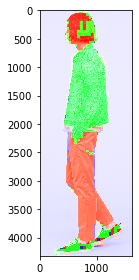

In [143]:
# Testing your work
image = io.imread('test.jpg')
segmented_image = segment_img(image)
io.imshow(segmented_image)

## Part B

You are required to implement your own function that computes the LBP histogram of a grayscale image (return to lecture slides for reference attached in this lab folder).

#### Note: you are allowed to ignore image border pixels.

In [144]:
def get_lbp_hist(grayscale_img):
    
#     print(grayscale_img)
    N,M=grayscale_img.shape
    lbp_hist=np.array(np.zeros(256)).astype('uint8')
    
    ouput_img=np.zeros(grayscale_img.shape)
    
    for i in range(0, N):
        for j in range(0, M):
            if i == 0 or i == N-1:
                continue
            if j == 0 or j == M-1:
                continue
                
            center_pixel=grayscale_img[i,j]
            neighbours_pixels=np.zeros(8)
            
            neighbours_pixels[0]=(grayscale_img[i-1,j-1] >= center_pixel)
            neighbours_pixels[1]=(grayscale_img[i-1,j]   >= center_pixel)
            neighbours_pixels[2]=(grayscale_img[i-1,j+1] >= center_pixel)
            neighbours_pixels[3]=(grayscale_img[i,j+1]   >= center_pixel)
            neighbours_pixels[4]=(grayscale_img[i+1,j+1] >= center_pixel)
            neighbours_pixels[5]=(grayscale_img[i+1,j]   >= center_pixel)
            neighbours_pixels[6]=(grayscale_img[i+1,j-1] >= center_pixel)
            neighbours_pixels[7]=(grayscale_img[i,j-1] >= center_pixel)
            
            power_list = [1, 2, 4, 8, 16, 32, 64, 128]
#             print(neighbours_pixels)
            neighbours_pixels*=power_list
#             print(neighbours_pixels)
            decimal_value=np.sum(neighbours_pixels).astype('uint8')
#             print(decimal_value)
            
            lbp_hist[decimal_value]+=1
            
            ouput_img[i,j]=decimal_value
            
#     print(lbp_hist)
#     print(ouput_img)
            
    return lbp_hist,ouput_img

In [145]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

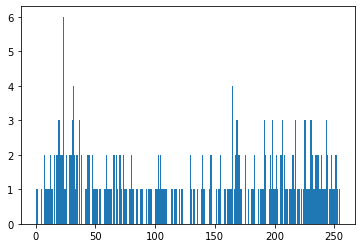

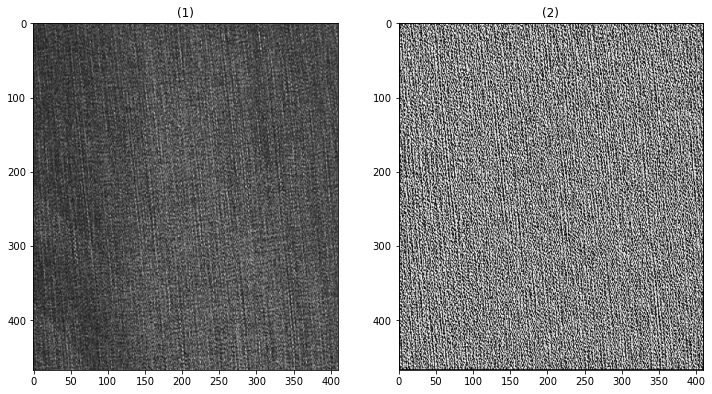

'ignore function output'

In [146]:
# Testing your work, we will compare your histogram with that of ours
# There should be a noticable difference between the histograms of jeans and cotton
img = rgb2gray(io.imread(r'imgs_patches\jeans1.jpg'))
hist,img2 = get_lbp_hist(img)
plt.hist(hist, bins=range((2 ** 8)))
show_images([img,img2])
'ignore function output'

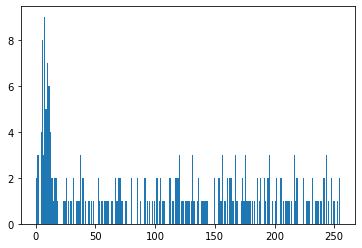

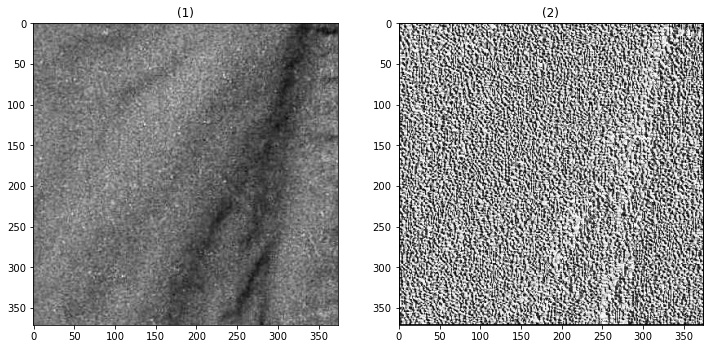

'ignore function output'

In [147]:
# Testing your work, we will compare your histogram with that of ours
# There should be a noticable difference between the histograms of jeans and cotton
img = rgb2gray(io.imread(r'imgs_patches\cotton1.jpg'))
hist, img2 = get_lbp_hist(img)
plt.hist(hist, bins=range((2 ** 8)))
show_images([img,img2])
'ignore function output'